In [2]:
#!pip install pandas-datareader

In [3]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [117]:
#get the Stock symbol from portfolio
#FAANG

assets=['SBI','RELIANCE.NS','PAGEIND.NS','HDFCBANK.NS','TCS.NS']

#assign weight to stocks
#all five stock to add upto=1 and assign equal amount of weights to the stocks
#20% of each of this stock in this portfolio 
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [118]:
#stock start and end date

stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-11-10'

In [119]:
#create dataframe to store adjusted close price
df=pd.DataFrame()
#store adjusted close price of the stock into the datframe
for stock in assets:
    df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [120]:
df

,SBI,RELIANCE.NS,PAGEIND.NS,HDFCBANK.NS,TCS.NS
Date,,,,,
2012-12-31,7.266400,NaN,NaN,NaN,NaN
2013-01-02,7.520514,392.408020,3164.144287,324.266479,528.343079
2013-01-03,7.444964,398.331543,3136.777344,322.379364,535.578552
2013-01-04,7.513647,398.840637,3164.608643,320.492340,543.357666
2013-01-07,7.451832,396.410980,3162.893066,315.232208,541.538025
...,...,...,...,...,...
2021-11-04,9.730000,2498.850098,39262.300781,1593.949951,3508.649902
2021-11-05,9.760000,NaN,NaN,NaN,NaN
2021-11-08,9.780000,2501.949951,39260.250000,1600.250000,3502.750000


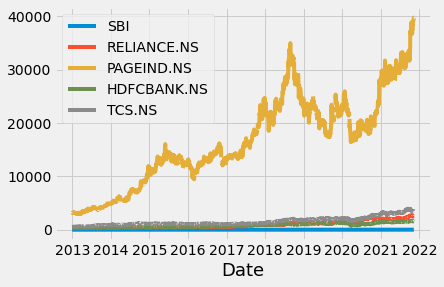

In [121]:
#visually show portfolio
my_stock=df
title='portfolio'
for c in my_stock.columns.values:
    plt.plot(my_stock[c],label=c)
plt.title=title
plt.xlabel('Date',fontsize=18)
plt.legend(my_stock.columns.values,loc='upper left')
plt.show()

In [122]:
#show daily simple return
returns=df.pct_change()
returns

,SBI,RELIANCE.NS,PAGEIND.NS,HDFCBANK.NS,TCS.NS
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.034971,NaN,NaN,NaN,NaN
2013-01-03,-0.010046,0.015095,-0.008649,-0.005820,0.013695
2013-01-04,0.009225,0.001278,0.008873,-0.005853,0.014525
2013-01-07,-0.008227,-0.006092,-0.000542,-0.016413,-0.003349
...,...,...,...,...,...
2021-11-04,0.004128,0.006140,0.007384,0.007904,0.004696
2021-11-05,0.003083,0.000000,0.000000,0.000000,0.000000
2021-11-08,0.002049,0.001241,-0.000052,0.003952,-0.001682


In [123]:
#create and return annulize Covarience Matrix
#diagonal is varience , off diagonals are co-varience
#252 -> number of trading days in Year
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,SBI,RELIANCE.NS,PAGEIND.NS,HDFCBANK.NS,TCS.NS
SBI,0.011762,0.002644,0.002251,0.004261,0.002148
RELIANCE.NS,0.002644,0.080711,0.017993,0.027557,0.016248
PAGEIND.NS,0.002251,0.017993,0.109387,0.015540,0.009626
HDFCBANK.NS,0.004261,0.027557,0.015540,0.054601,0.011429
TCS.NS,0.002148,0.016248,0.009626,0.011429,0.060771


In [124]:
#portfolio varience
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.021464875068290926

In [125]:
#portfolio volatility aka standard devaition
port_volatility=np.sqrt(port_varience)
port_volatility

0.2439114480674213

In [126]:
#calculate return of annual portfolio
#252 -> number of trading days in Year
portfolioSimpleAnnualReturn=np.sum(returns.mean() * weights) *252
portfolioSimpleAnnualReturn

0.21595419237321412

In [127]:
#Show the expected annual return, volatility (risk), and variance


percent_var= str(round(port_variance, 2) * 100) +  '%'                                                                                                        

percent_vols = str(round(port_volatility, 2) * 100 )+ '%'

percent_ret = str(round (portfolioSimpleAnnualReturn, 2) * 100) + '%'                                                                                                                                                                                                                                                                      

print ('Expected annual return: '+ percent_ret)

print ('Annual volatility /risk: '+ percent_vols)

print ('Annual variance: '+ percent_var)

Expected annual return: 22.0%
Annual volatility /risk: 24.0%
Annual variance: 2.0%


In [103]:
#!pip install PyPortfolioOpt

In [69]:
#!pip install empyrial

In [70]:
#!pip install --upgrade pip setuptools wheel

In [74]:
#!pip install cvxpy

In [77]:
#conda install -c conda-forge cvxpy